# Natural Language Processing (NLP)

# NLP model with ML on amazonreviews dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import math 
import warnings
warnings.filterwarnings('ignore')

In [2]:
amazon= pd.read_csv(r"D:\Python\Python data set lec\NLP\amazonreviews.tsv" , sep='\t')     

In [3]:
amazon.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [4]:
amazon.shape

(10000, 2)

# To check the null values

In [5]:
amazon.isnull().sum()

label     0
review    0
dtype: int64

# Convert target variable into numeric 

In [6]:
amazon.label.value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [7]:
amazon.label.replace({'neg' : 0 , 'pos' : 1} , inplace=True)

In [8]:
amazon.label.value_counts()

0    5097
1    4903
Name: label, dtype: int64

# Process the Data

# Convert all upper string case into lower string case 

In [9]:
amazon.review = amazon.review.str.lower()   

In [10]:
amazon.head()

,label,review
0,1,stuning even for the non-gamer: this sound tra...
1,1,the best soundtrack ever to anything.: i'm rea...
2,1,amazing!: this soundtrack is my favorite music...
3,1,excellent soundtrack: i truly like this soundt...
4,1,"remember, pull your jaw off the floor after he..."


# Remove the stopwords & punctuation marks by using user-defined function

In [11]:
from nltk.corpus import stopwords

In [12]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
len(stopwords.words('english'))

179

In [14]:
import string

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def text_process(mess):            ### creating a function
    """                                                        ## A docstring
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = "".join(nopunc)
    
    return [ word for word in nopunc.split() if word not in stopwords.words("english")]


In [17]:
amazon['review'].apply(text_process)

0       [stuning, even, nongamer, sound, track, beauti...
1       [best, soundtrack, ever, anything, im, reading...
2       [amazing, soundtrack, favorite, music, time, h...
3       [excellent, soundtrack, truly, like, soundtrac...
4       [remember, pull, jaw, floor, hearing, youve, p...
                              ...                        
9995    [revelation, life, small, town, america, early...
9996    [great, biography, interesting, journalist, bi...
9997    [interesting, subject, poor, presentation, you...
9998    [dont, buy, box, looked, used, obviously, new,...
9999    [beautiful, pen, fast, delivery, pen, shipped,...
Name: review, Length: 10000, dtype: object

# CountVectorizer ... Count of each & every words

In [18]:
from sklearn.feature_extraction.text import CountVectorizer 

In [19]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(amazon['review'])

In [20]:
bow_transformer.vocabulary_  

{'stuning': 34189,
 'even': 12595,
 'nongamer': 24278,
 'sound': 33125,
 'track': 36325,
 'beautiful': 3941,
 'paints': 25720,
 'senery': 31523,
 'mind': 22665,
 'well': 38818,
 'would': 39538,
 'recomend': 29102,
 'people': 26193,
 'hate': 16497,
 'vid': 38116,
 'game': 14941,
 'music': 23568,
 'played': 26823,
 'chrono': 6964,
 'cross': 8903,
 'games': 14971,
 'ever': 12608,
 'best': 4239,
 'backs': 3531,
 'away': 3391,
 'crude': 8936,
 'keyboarding': 19746,
 'takes': 34897,
 'fresher': 14581,
 'step': 33794,
 'grate': 15807,
 'guitars': 16080,
 'soulful': 33109,
 'orchestras': 25171,
 'impress': 17969,
 'anyone': 2530,
 'cares': 6094,
 'listen': 20917,
 'soundtrack': 33147,
 'anything': 2538,
 'im': 17820,
 'reading': 28886,
 'lot': 21215,
 'reviews': 30044,
 'saying': 30943,
 'figured': 13711,
 'id': 17672,
 'write': 39594,
 'review': 30033,
 'disagree': 10372,
 'bit': 4457,
 'opinino': 25096,
 'yasunori': 39747,
 'mitsudas': 22881,
 'ultimate': 37007,
 'masterpiece': 21946,
 'time

In [21]:
len(bow_transformer.vocabulary_)  

40040

# Term Document Frequency(TDM)

In [22]:
amazon_bow = bow_transformer.transform(amazon.review)

In [23]:
amazon_bow.shape

(10000, 40040)

In [24]:
type(amazon_bow)

scipy.sparse.csr.csr_matrix

# Train-Test Split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train , x_test , y_train , y_test = train_test_split(amazon_bow , amazon.label , test_size=.2) 

# Model building

# 1) Logistic_Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
logreg= LogisticRegression()

In [42]:
logreg.fit(x_train , y_train ) 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
pred_log = logreg.predict(x_test) 
pred_log

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [44]:
tab_log = confusion_matrix( pred_log , y_test)
tab_log

array([[872, 147],
       [143, 838]], dtype=int64)

In [45]:
logreg.coef_ 

array([[-0.12935957,  0.05694811, -0.00183452, ...,  0.        ,
        -0.06537269, -0.01797832]])

In [46]:
logreg.intercept_ 

array([-0.17695236])

In [47]:
print(classification_report(y_test , pred_log))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1015
           1       0.85      0.85      0.85       985

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [48]:
pred_prob_train = logreg.predict_proba(x_train)
pred_prob_test  = logreg.predict_proba(x_test)

In [49]:
pred_prob_test = pd.DataFrame(pred_prob_test)

pred_prob_test.rename(columns ={pred_prob_test.columns[0]: "Pred_Prob0" , 
                                pred_prob_test.columns[1]: "Pred_prob1"} , inplace = True)
pred_prob_test

,Pred_Prob0,Pred_prob1
0,0.715394,0.284606
1,0.999896,0.000104
2,0.954245,0.045755
3,0.682121,0.317879
4,0.354863,0.645137
...,...,...
1995,0.013262,0.986738
1996,0.243968,0.756032
1997,0.766918,0.233082
1998,0.031605,0.968395


In [50]:
from sklearn.metrics import  roc_curve , roc_auc_score

In [51]:
fpr , tpr , thershold = roc_curve(y_test , pred_prob_test.iloc[: , 1] ) 

In [52]:
area_auroc = roc_auc_score(y_test , pred_log)
area_auroc_ = np.round(area_auroc , 3)
print('AUROC CURVE = ' , area_auroc_ )

AUROC CURVE =  0.855


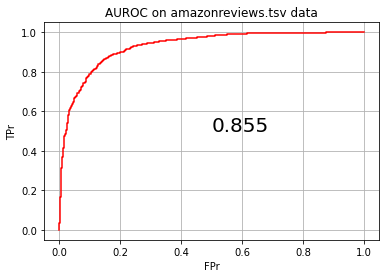

In [53]:
plt.plot(fpr , tpr , color = "r")
plt.xlabel("FPr")
plt.ylabel("TPr")
plt.title("AUROC on amazonreviews.tsv data")
plt.text(x = 0.5 , y = 0.5, s = area_auroc_ , size = 20)
plt.grid()

# 2) Decision Tree

# Grid search

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [56]:
search_dict = {"criterion" : ('entropy' , 'gini'),
              "max_depth" : ( 3,4,5,6,7,8,9 ,10, 12),
              "min_samples_split": (25, 50 , 75, 100 ,150,200)}

In [57]:
grid_dt = GridSearchCV(dtc , param_grid= search_dict)

In [58]:
grid_dt.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': (3, 4, 5, 6, 7, 8, 9, 10, 12),
                         'min_samples_split': (25, 50, 75, 100, 150, 200)})

In [59]:
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 200}

# DT by using Grid search

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="gini" , max_depth = 12 , min_samples_split=200 , class_weight="balanced" )

In [63]:
dtc.fit(x_train , y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=12,
                       min_samples_split=200)

In [64]:
pred_dtc = dtc.predict(x_test)
pred_dtc

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [65]:
tab_dtc = confusion_matrix(pred_dtc , y_test)
tab_dtc

array([[785, 383],
       [230, 602]], dtype=int64)

In [66]:
print(classification_report( y_test , pred_dtc))

              precision    recall  f1-score   support

           0       0.67      0.77      0.72      1015
           1       0.72      0.61      0.66       985

    accuracy                           0.69      2000
   macro avg       0.70      0.69      0.69      2000
weighted avg       0.70      0.69      0.69      2000



# 3) DT with ADA-BOOST

In [67]:
from sklearn.ensemble import AdaBoostClassifier
abc_dtc = AdaBoostClassifier(dtc , n_estimators=25)

In [68]:
abc_dtc.fit(x_train , y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=12,
                                                         min_samples_split=200),
                   n_estimators=25)

In [69]:
pred_dtc_boost = abc_dtc.predict(x_test)
pred_dtc_boost

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [70]:
tab_dtc_boost = confusion_matrix(pred_dtc_boost , y_test)
tab_dtc_boost 

array([[810, 186],
       [205, 799]], dtype=int64)

In [71]:
print(classification_report( y_test , pred_dtc_boost)) 

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1015
           1       0.80      0.81      0.80       985

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



# 4) Random Tree

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [73]:
search_rf = {"criterion" : ('entropy' , 'gini'),
              "max_depth" : (3,4,5,6,7),
              "n_estimators": (25,50, 100 , 150, 200)}

In [74]:
grid_rf = GridSearchCV(rf , param_grid= search_rf)

In [75]:
grid_rf.fit(x_train , y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': (3, 4, 5, 6, 7),
                         'n_estimators': (25, 50, 100, 150, 200)})

In [76]:
grid_rf.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 200}

# RF by using Grid search

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion= 'entropy', max_depth= 7 , n_estimators= 200 , class_weight="balanced")

In [78]:
rf.fit(x_train , y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, n_estimators=200)

In [79]:
pred_rfc = rf.predict(x_test)
pred_rfc

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [80]:
tab_rfc = confusion_matrix(pred_rfc , y_test)
tab_rfc

array([[758, 106],
       [257, 879]], dtype=int64)

In [81]:
print(classification_report( y_test , pred_rfc))  

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1015
           1       0.77      0.89      0.83       985

    accuracy                           0.82      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.83      0.82      0.82      2000



# 5) RF with ADA-BOOST

In [82]:
from sklearn.ensemble import AdaBoostClassifier
abc_rfc = AdaBoostClassifier(rf)

In [83]:
abc_rfc.fit(x_train , y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=7,
                                                         n_estimators=200))

In [84]:
pred_rfc_boost = abc_rfc.predict(x_test)
pred_rfc_boost

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [85]:
tab_rfc_boost = confusion_matrix(pred_rfc_boost , y_test)
tab_rfc_boost

array([[860, 123],
       [155, 862]], dtype=int64)

In [86]:
print(classification_report( y_test , pred_rfc_boost))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1015
           1       0.85      0.88      0.86       985

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



# 6) Naive Bayes

In [89]:
from sklearn.naive_bayes import MultinomialNB
naive_bays = MultinomialNB()

In [90]:
nb = naive_bays.fit(x_train , y_train)

In [91]:
pred_nb = nb.predict(x_test)
pred_nb 

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [92]:
tab_nb = confusion_matrix(pred_nb , y_test)
tab_nb

array([[878, 174],
       [137, 811]], dtype=int64)

In [93]:
print(classification_report(y_test , pred_nb))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1015
           1       0.86      0.82      0.84       985

    accuracy                           0.84      2000
   macro avg       0.85      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000



# 7) KNN 

In [94]:
amazon_bow.shape

(10000, 40040)

In [97]:
k=np.sqrt(amazon_bow.shape[0])
k

100.0

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 100)

In [99]:
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=100)

In [100]:
pred_knn = knn.predict(x_test)
pred_knn

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [101]:
tab_knn = confusion_matrix(pred_knn , y_test)
tab_knn

array([[258,  33],
       [757, 952]], dtype=int64)

In [102]:
print(classification_report(y_test , pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.25      0.40      1015
           1       0.56      0.97      0.71       985

    accuracy                           0.60      2000
   macro avg       0.72      0.61      0.55      2000
weighted avg       0.72      0.60      0.55      2000



# 8) SVM 

In [109]:
from sklearn.model_selection import GridSearchCV

search_dict = {"kernel" : ('linear', 'poly' , 'rbf', 'sigmoid')}

from sklearn.svm import SVC
svc_model = SVC()

grid_svc = GridSearchCV(svc_model , param_grid= search_dict)

In [110]:
grid_svc.fit(x_train , y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ('linear', 'poly', 'rbf', 'sigmoid')})

In [111]:
grid_svc.best_params_    

{'kernel': 'rbf'}

# SVM by using Grid Search

In [112]:
from sklearn.svm import SVC

In [113]:
svm_best = SVC(kernel ='rbf')

In [114]:
svm_best.fit(x_train , y_train)

SVC()

In [115]:
pred_svm = svm_best.predict(x_test)
pred_svm

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [116]:
tab_svm = confusion_matrix(pred_svm , y_test)
tab_svm 

array([[881, 160],
       [134, 825]], dtype=int64)

In [117]:
print(classification_report(y_test , pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1015
           1       0.86      0.84      0.85       985

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



# Vader()

In [3]:
amazon= pd.read_csv(r"D:\Python\Python data set lec\NLP\amazonreviews.tsv" , sep='\t')     

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent = SentimentIntensityAnalyzer()

In [5]:
abc = sent.polarity_scores(amazon.iloc[0][1])         # applied on 1st comment
abc

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

In [6]:
abc['compound']

0.9454

In [7]:
amazon.iloc[0][1]

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [8]:
amazon.head(3)

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...


In [10]:
score_com = []
score_pos = []
score_neg = []

for i in range (0,amazon.shape[0]):
    score = sent.polarity_scores(amazon.iloc[i][1]) #this [1] is for the 2nd column(review colomun)
    score1 = score["compound"]
    score_com.append(score1)
    # below 2 lines to extract the positive sentimnet
    score2 = score['pos']
    score_pos.append(score2)

    # below 2 lines to extarct the negative sentimnet
    
    score2 = score["neg"]
    score_neg.append(score2)

In [11]:
np.mean(score_com)

0.33520672

# now we create dataframe

In [12]:
amazon['com_score'] = score_com # adding the new column to the datafram
amazon['pos_score'] = score_pos
amazon['neg_score'] = score_neg

In [13]:
amazon.head()

,label,review,com_score,pos_score,neg_score
0,pos,Stuning even for the non-gamer: This sound tra...,0.9454,0.243,0.088
1,pos,The best soundtrack ever to anything.: I'm rea...,0.8957,0.145,0.018
2,pos,Amazing!: This soundtrack is my favorite music...,0.9858,0.268,0.040
3,pos,Excellent Soundtrack: I truly like this soundt...,0.9814,0.295,0.090
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",0.9781,0.254,0.000


In [14]:
amazon['com_score'].mean()

0.3352067199999999

In [15]:
amazon['pos_score'].mean()

0.15151900000000001

In [16]:
amazon['neg_score'].mean()

0.07635639999999992

In [17]:
amazon[amazon.label == "neg"].head(10)          # to do mannual analysis

,label,review,com_score,pos_score,neg_score
6,neg,"Buyer beware: This is a self-published book, a...",-0.8744,0.069,0.124
10,neg,The Worst!: A complete waste of time. Typograp...,-0.9274,0.054,0.360
13,neg,Oh please: I guess you have to be a romance no...,0.9097,0.199,0.077
14,neg,Awful beyond belief!: I feel I have to write t...,-0.9312,0.074,0.171
15,neg,Don't try to fool us with fake reviews.: It's ...,-0.5414,0.063,0.105
19,neg,sizes recomended in the size chart are not rea...,0.4926,0.065,0.000
20,neg,mens ultrasheer: This model may be ok for sede...,0.6318,0.170,0.134
22,neg,Another Abysmal Digital Copy: Rather than scra...,0.9667,0.145,0.037
25,neg,Problem with charging smaller AAAs: I have had...,-0.7845,0.090,0.149
26,neg,"Works, but not as advertised: I bought one of ...",-0.0857,0.080,0.092


# Text Blob

In [18]:
amazon= pd.read_csv(r"D:\Python\Python data set lec\NLP\amazonreviews.tsv" , sep='\t')     

In [19]:
from textblob import TextBlob

In [20]:
polarity_score=[]

for i in range(0,amazon.shape[0]):
    score= TextBlob(amazon.iloc[i][1])
    score1 = score.sentiment[0]      # it will fetch the polarity 
    polarity_score.append(score1)

In [21]:
amazon =pd.concat([amazon,pd.Series(polarity_score)], axis=1)
amazon

,label,review,0
0,pos,Stuning even for the non-gamer: This sound tra...,-0.021875
1,pos,The best soundtrack ever to anything.: I'm rea...,0.261111
2,pos,Amazing!: This soundtrack is my favorite music...,0.274691
3,pos,Excellent Soundtrack: I truly like this soundt...,0.272727
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",0.324802
...,...,...,...
9995,pos,A revelation of life in small town America in ...,0.216146
9996,pos,Great biography of a very interesting journali...,0.282051
9997,neg,Interesting Subject; Poor Presentation: You'd ...,-0.019048
9998,neg,Don't buy: The box looked used and it is obvio...,-0.085227


In [22]:
amazon.rename(columns={amazon.columns[2]: "sentiment_score"}, inplace=True)

In [23]:
amazon.head()

,label,review,sentiment_score
0,pos,Stuning even for the non-gamer: This sound tra...,-0.021875
1,pos,The best soundtrack ever to anything.: I'm rea...,0.261111
2,pos,Amazing!: This soundtrack is my favorite music...,0.274691
3,pos,Excellent Soundtrack: I truly like this soundt...,0.272727
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",0.324802
